## Steady State Model for Doubly Fed Induction Generator (EE5703 Assigment) 
A0260045R MiaoChenxin
1. The task for the Assigment is to model a Doubly Fed Induction Generator operating in steady state for a Wind Turbine Application. 
2. Develop the model for steady state from the space vector based equations. Assume that there is a rotor voltage space vector available. 
3. Find the expressions for the stator electrical power and rotor electrical power. 
4. The rotor voltage space vector can be controlled to have a magnitude from 0 to 1p.u. and any angle
5. What would be the rotor current if the power delivered to the grid is -0.5 p.u ? 
6. Draw the curve of rotor current magnitude when the slip is varied between pull-out slip to zero slip
7. What is the power factor at the stator and the power factor at rotor end connected to grid (assuming only sinusoidal quantities)? [An AC/DC converter connected to grid feeds a DC link, a DC to AC converter is connected to DC bus. The AC end of DC to AC converter is connected to the rotor terminals to provide $\vec
{v}_r$]
8. Draw the curve of rotor power as the slip changes
9. *Bonus Points* Draw the curve for change in rotor current and rotor power if the rotor voltage magnitude is changes with respect to stator voltage (which is fixed at grid voltage) 


Use the following normalized parameters of the motor 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from math import pi,cos,sin,tan
#import handcalcs.render
import cmath

In [16]:
mach_ma = {"rs": 0.015, "rr": 0.04, "lh": 2.31, "ls": 2.35, "lr": 2.35, "tmech":596.9}

#defining parmeters for a T-equivalent circuit
def mach_Tpara(dict):
    rs = dict["rs"]
    rr = dict["rr"]
    lh = dict["lh"]
    ls = dict["ls"]
    lr = dict["lr"]
    sig= 1-(lh*lh)/(lr*ls)
    kr=lh/lr
    sigs= ls- lh
    sigr = lr - lh
    lsigss = sigs*lh
    lsigrr = sigr*lh
#     print(ls)
    return rs,rr,lh,ls,lr,sig,lsigss,lsigrr

def plot_cvector(C):
    xe = C.real
    ye = C.imag
    x0 = 0.0
    y0 = 0.0
    return [x0,y0,xe,ye]

In [17]:
rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_ma)

#### 2. Steady State model of Doubly fed IG
\begin{align}
\vec{v}_s & = r_s\vec{i}_s + \frac{d\psi_s}{d\tau}\\
\vec{v}_r &= r_r\vec{i}_r +  \frac{d\psi_r}{d\tau} - j\omega\vec{\psi_r}\\
\vec{\psi_s} &= l_s\vec{i}_s + l_h\vec{i}_r\\
\vec{\psi_r} &= l_h\vec{i}_s + l_r\vec{i}_r\\
\vec{\sigma} &= 1 - l_m^2/l_sl_r\\
\end{align}
After calculation we get: 
\begin{align}
\vec{v}_s & = r_s\vec{i}_s + j\omega_s\vec{\psi}_s = r_s\vec{i}_s + j\omega_sl_s\vec{i}_s + j\omega_sl_h\vec{i}_r\\
\vec{v}_r &= r_r\vec{i}_r + j\omega_r\vec{\psi}_r = r_r\vec{i}_r + js\omega_sl_r\vec{i}_r + js\omega_sl_h\vec{i}_s\\\
\end{align}
Neglecting the stator resistance, we get
\begin{align}
\vec{v}_s & = j\omega_sl_s\vec{i}_s + j\omega_sl_h\vec{i}_r\\
\vec{i}_s & = \frac{1}{j\omega_sl_s}\vec{v}_s - \frac{l_h}{l_s}\vec{i}_r\\
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r + j\omega_sl_h\vec{i}_s\\
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r + j\omega_sl_h\left[ - \frac{l_h}{l_s}\vec{i}_r + \frac{1}{j\omega_sl_s}\vec{v}_s \right]\\
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r - j\omega_s\frac{l^{2}_{h}}{l_s}\vec{i}_r + \frac{l_h}{l_s}\vec{v}_s\\
\frac{\vec{v}_r}{s}-\frac{l_h}{l_s}\vec{v}_s &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r\left(1 - j\omega_s\frac{l^{2}_{h}}{l_rl_s}\right) \\
\frac{\vec{v}_r}{s}-\frac{l_h}{l_s}\vec{v}_s &= \frac{r_r}{s}\vec{i}_r + j\omega_s\sigma l_r\vec{i}_r\\
\vec{i}_r & = \frac{\frac{\vec{v}_r}{s}-\frac{l_h}{l_s}\vec{v}_s}{\frac{r_r}{s} + j\omega_s\sigma l_r}
\end{align}

#### 3. Stator power and rotor power
Stator power:
\begin{align}
p_s &=  \Re\{\vec{v}^{*}_s\cdot\vec{i}_s\}
\end{align}
Rotor power:
\begin{align}
p_r &=  \Re\left[\vec{v}^{*}_r\cdot\vec{i}_r \right]
\end{align}



### 4. The rotor voltage space vector can be controlled to have a magnitude from 0 to 1p.u. and any angle
### 5. What would be the rotor current if the power delivered to the grid is -0.5 p.u ? 
if the power delivered to the grid is -0.5 p.u, which means that the energy is opposite and grid gives power to the system. The stator is connected to the grid and recieves the power, therefore the power given from stator Ps = - 0.5 p.u

In [18]:
ws = 1.0
sp = rr/(ws*(lsigss + lsigrr))
sx = 0.05
vs = complex(0,1.0)

is0 =  vs/(complex(0,ws*ls)) #no load stator current
zr = complex(rr,sx*ws*sig*lr) # rotor impedence
#------------------------
# ir1 = (vrbysx - vs*lh/ls)/zr
ird_list = np.arange(0.01,1, 0.01)
irq_list = np.arange(0.01,1, 0.01)
ir_list = []
for ird in ird_list:
    for irq in irq_list:
        irn = complex(ird,irq) 
        is1 = is0 - lh*irn/ls #stator current
        vrx = zr*irn + complex(0,1)*sx*ws*lh*is1
        Ss = vs*np.conj(is1)
        Ps = Ss.real
        if Ps> -0.51 and Ps < -0.499:
            print('rotor currentr ir = {0:3.2f}'.format(irn))
            ir_list.append(irn)
            #print("Real power drawn from stator = {0:3.2f}".format(Ps))
        else:
            continue

rotor currentr ir = 0.01+0.51j
rotor currentr ir = 0.02+0.51j
rotor currentr ir = 0.03+0.51j
rotor currentr ir = 0.04+0.51j
rotor currentr ir = 0.05+0.51j
rotor currentr ir = 0.06+0.51j
rotor currentr ir = 0.07+0.51j
rotor currentr ir = 0.08+0.51j
rotor currentr ir = 0.09+0.51j
rotor currentr ir = 0.10+0.51j
rotor currentr ir = 0.11+0.51j
rotor currentr ir = 0.12+0.51j
rotor currentr ir = 0.13+0.51j
rotor currentr ir = 0.14+0.51j
rotor currentr ir = 0.15+0.51j
rotor currentr ir = 0.16+0.51j
rotor currentr ir = 0.17+0.51j
rotor currentr ir = 0.18+0.51j
rotor currentr ir = 0.19+0.51j
rotor currentr ir = 0.20+0.51j
rotor currentr ir = 0.21+0.51j
rotor currentr ir = 0.22+0.51j
rotor currentr ir = 0.23+0.51j
rotor currentr ir = 0.24+0.51j
rotor currentr ir = 0.25+0.51j
rotor currentr ir = 0.26+0.51j
rotor currentr ir = 0.27+0.51j
rotor currentr ir = 0.28+0.51j
rotor currentr ir = 0.29+0.51j
rotor currentr ir = 0.30+0.51j
rotor currentr ir = 0.31+0.51j
rotor currentr ir = 0.32+0.51j
rotor cu

Text(0, 0.5, 'irq')

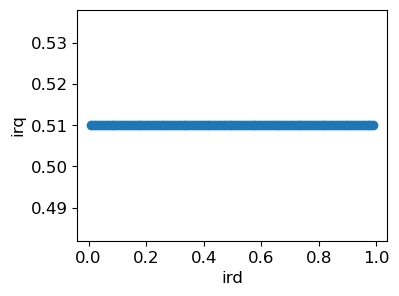

In [19]:
ir = np.array(ir_list)
plt.figure(101,figsize = (4,3))
plt.plot(ir.real,ir.imag,'o')
plt.xlabel('ird')
plt.ylabel('irq')

It can be seen that the stator power is only related to irq rather than ird. When stator power is fixed then irq is fixed value too.

### 6. Draw the curve of rotor current magnitude when the slip is varied between pull-out slip to zero slip

\begin{align}
\vec{i}_r & = \frac{\frac{\vec{v}_r}{s}-\frac{l_h}{l_s}\vec{v}_s}{\frac{r_r}{s} + j\omega_s\sigma l_r}
\end{align}

In [20]:
sp = rr/(ws*(lsigss + lsigrr))
sp

0.21645021645021628

In [21]:
vs = complex(0,1.0)
s = np.arange(-1,1,0.001)
ws = 1
rang = pi/10
ir = np.zeros(len(s), dtype = complex)
for i,sx in enumerate(s):
        vrmag = sx*np.abs(vs)*lh/ls
        vrbysx = cmath.rect(vrmag/sx,rang)
        zr = complex(rr/sx,ws*sig*lr)
        ir0 = (vrbysx - vs*lh/ls)/zr
        is0 = vs/complex(0,ws*ls) - lh*ir0/ls
        fenzi = vrbysx/sx-(lh/ls)*vs
        fenmu = rr/sx + complex(0,1)*ws*sig*lr
        ir_ = fenzi/fenmu
        ir[i] = ir_
        #print('ir:',ir_)

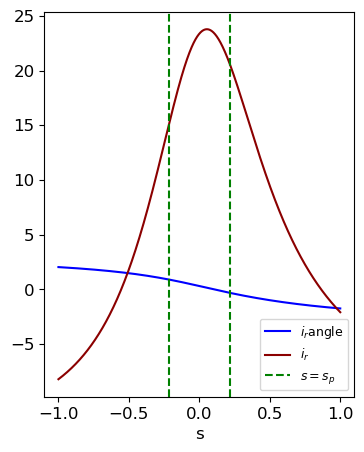

In [22]:
plt.figure(212, figsize = (4,5))
plt.rc('font', size =12)
plt.plot(s,np.angle(ir),c = 'blue', lw =1.5, label =r"$i_{r}$angle")
plt.plot(s,ir,c = 'darkred', lw =1.5, label =r"$i_{r}$")
plt.xlabel('s')
plt.axvline(x=sp, linestyle='--', color='g', label="$s=s_p$")
plt.axvline(x=-sp, linestyle='--', color='g')
plt.legend(loc = 'lower right', fontsize = 9)
plt.show()

## 7. What is the power factor at the stator and the power factor at rotor end connected to grid (assuming only sinusoidal quantities)? [An AC/DC converter connected to grid feeds a DC link, a DC to AC converter is connected to DC bus. The AC end of DC to AC converter is connected to the rotor terminals to provide $\vec{v}_r$]
## 8. Draw the curve of rotor power as the slip changes

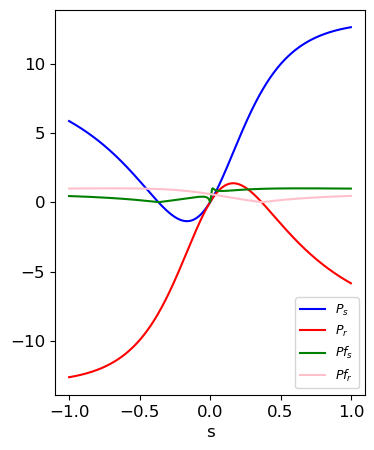

In [23]:
vs = complex(0,1.0)
ws = 1.0
sp = rr/(ws*(lsigss + lsigrr))
s = np.arange(-1.0,1.0,0.001)
rangn = pi/10
ir_s = np.zeros(len(s), dtype = complex)
is_s = np.zeros(len(s), dtype = complex)

Ps = np.zeros(len(s))
Pr = np.zeros(len(s))
Pfs = np.zeros(len(s))
Pfr = np.zeros(len(s))

for i,sx in enumerate(s):
    vrbysx = cmath.rect(sx*(lh/ls),rangn)/sx
    zr = complex(rr/sx,ws*sig*lr)
    ir_s[i] = (vrbysx - vs*lh/ls)/zr
    is_s[i] = vs/complex(0,ws*ls) - lh*ir_s[i]/ls 
    Ss_s = np.conj(vs)*is_s[i]
    Ps[i] = Ss_s.real
    Pfs[i] = np.abs(Ss_s.real)/np.abs(Ss_s)
    Sr_s = np.conj(vrbysx)*ir_s[i]
    Pr[i] = Sr_s.real
    Pfr[i] = np.abs(Sr_s.real)/np.abs(Sr_s)
    
plt.figure(212, figsize = (4,5))
plt.rc('font', size =12)
plt.xlabel('s')
plt.plot(s,Ps,c = 'b', lw =1.5, label =r"$P_{s}$") # stator power
plt.plot(s,Pr,c = 'r', lw =1.5, label =r"$P_{r}$") #rotor power 
plt.plot(s,Pfs,c = 'g', lw =1.5, label =r"$Pf_{s}$") # stator power factor
plt.plot(s,Pfr,c = 'pink', lw =1.5, label =r"$Pf_{r}$") #rotor power factor
plt.legend(loc = 'lower right', fontsize = 9)
plt.show()

## 9. *Bonus Points* Draw the curve for change in rotor current and rotor power if the rotor voltage magnitude is changes with respect to stator voltage (which is fixed at grid voltage)

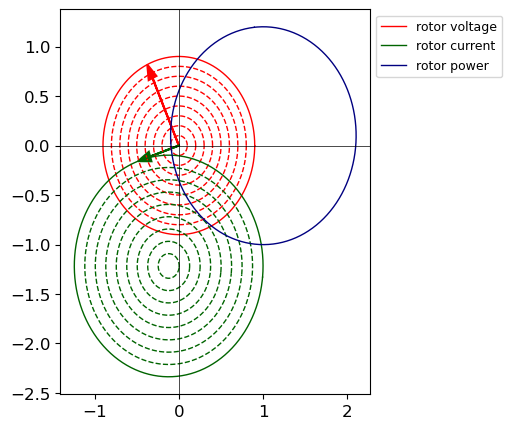

In [24]:
ss = np.arange(-1.0,1.0,0.001)
vrmag = 1
vrx = np.arange(0,1,0.1)
rang = np.arange(0,2*pi,0.01)
sx = 0.05
ira = np.zeros((len(rang),len(vrx)), dtype = complex)
isa = np.zeros((len(rang),len(vrx)), dtype = complex)
vra = np.zeros((len(rang),len(vrx)), dtype = complex)
Ssa = np.zeros((len(rang),len(vrx)), dtype = complex)
Sra =  np.zeros((len(rang),len(vrx)), dtype = complex)

for vv,vn in enumerate(vrx):
    for ii,rangn in enumerate(rang):
        vs = complex(0,1.0)
        ws = 1.0
        vra[ii,vv] = cmath.rect(vn*sx,rangn)/sx
        zr = complex(rr/sx,ws*sig*lr)
        ira[ii,vv] = (vra[ii,vv] - vs*lh/ls)/zr
        isa[ii,vv] = vs/complex(0,ws*ls) - lh*ira[ii,vv]/ls
        Ssa[ii,vv] = vs*np.conj(isa[ii,vv])
        Sra[ii,vv] = vra[ii,vv]*np.conj(ira[ii,vv])
plt.figure(201,figsize = (4,5))
plt.rc('font', size = 12)
#plt.arrow(0,0,0,1, fc ='orange', ec ='orange', lw = 1.5, length_includes_head = True, head_width = 0.1)
#plt.plot(isa[:,-1].real,isa[:,-1].imag, c ='magenta', lw = 1, label = "stator current")
#plt.plot(isa[:,0:-1].real,isa[:,0:-1].imag,ls = "--", c ='magenta', lw = 1)
#plt.arrow(0,0,isa[200,-1].real,isa[200,-1].imag, fc ='magenta', ec = 'magenta',lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(vra[:,-1].real,vra[:,-1].imag, c ='r', lw = 1, label = 'rotor voltage')
plt.plot(vra[:,0:-1].real,vra[:,0:-1].imag,ls = '--', c ='r', lw = 1)
plt.arrow(0,0,vra[200,-1].real,vra[200,-1].imag, ec ='r', fc = 'r',lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(ira[:,-1].real,ira[:,-1].imag, c ='darkgreen',lw = 1, label = "rotor current")
plt.plot(ira[:,0:-1].real,ira[:,0:-1].imag,ls = '--', c ='darkgreen',lw = 1)
plt.arrow(0,0,ira[200,-1].real,ira[200,-1].imag, ec ='darkgreen',fc = 'darkgreen',lw = 1.5, length_includes_head = True, head_width = 0.1)
#plt.plot(Ssa[:,-1].real,Ssa[:,-1].imag, c ='blue',lw = 1, label = "Stator power")
plt.plot(Sra[:,-1].real,Sra[:,-1].imag, c ='navy',lw = 1, label = "rotor power")
plt.axhline(0, c = 'k', lw = 0.5)
plt.axvline(0, c = 'k', lw = 0.5)
plt.legend(loc = "upper left", bbox_to_anchor = (1.0,1.0), fontsize = 9)